# Initial Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sp600.csv")
df = df[["Date","Open"]]
df = df.set_index("Date")
df["% Change"] = df["Open"].pct_change().shift(periods=-1, fill_value=0)
df.head(7)

,Open,% Change
Date,,
1989-01-03,57.759998,0.010388
1989-01-04,58.360001,0.002056
1989-01-05,58.480000,0.006840
1989-01-06,58.880001,-0.001189
1989-01-09,58.810001,-0.002551
1989-01-10,58.660000,0.000170
1989-01-11,58.669998,0.003920


### Get Stock Data from 1990-4-16 to 2020-4-16
Calculate moving average windows

In [4]:
df["5D MA"] = df["Open"].rolling(window=5).mean()  
df["10D MA"] = df["Open"].rolling(window=10).mean() 
df["30D MA"] = df["Open"].rolling(window=30).mean() 
df["60D MA"] = df["Open"].rolling(window=60).mean() 
df["90D MA"] = df["Open"].rolling(window=90).mean()
df = df[89:]

In [5]:
df.head()

,Open,% Change,5D MA,10D MA,30D MA,60D MA,90D MA
Date,,,,,,,
1989-05-10,64.480003,0.001241,64.268001,64.159,63.007333,62.010000,61.219333
1989-05-11,64.559998,0.007280,64.350000,64.215,63.127000,62.075667,61.294889
1989-05-12,65.029999,0.000154,64.500000,64.297,63.250666,62.147333,61.369000
1989-05-15,65.040001,0.000307,64.678000,64.403,63.372333,62.215500,61.441889
1989-05-16,65.059998,0.004919,64.834000,64.507,63.495333,62.280667,61.510556


In [6]:
#Plot

In [7]:
strategies = ["5D MA", "10D MA", "30D MA", "60D MA", "90D MA"]
booleanDictionary = {True: 'Buy', False: 'Sell'}
df["Hold"] = ["Buy"] * len(df)

for col in strategies:
    df[col] = df["Open"] >= df[col]
    df[col] = df[col].map(booleanDictionary)

In [8]:
df.head()

,Open,% Change,5D MA,10D MA,30D MA,60D MA,90D MA,Hold
Date,,,,,,,,
1989-05-10,64.480003,0.001241,Buy,Buy,Buy,Buy,Buy,Buy
1989-05-11,64.559998,0.007280,Buy,Buy,Buy,Buy,Buy,Buy
1989-05-12,65.029999,0.000154,Buy,Buy,Buy,Buy,Buy,Buy
1989-05-15,65.040001,0.000307,Buy,Buy,Buy,Buy,Buy,Buy
1989-05-16,65.059998,0.004919,Buy,Buy,Buy,Buy,Buy,Buy


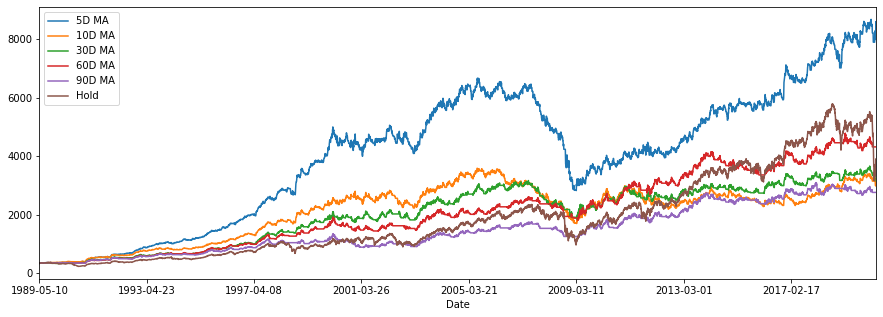

In [9]:
strategies = ["5D MA", "10D MA", "30D MA", "60D MA", "90D MA", "Hold"]

df_portfolios = pd.DataFrame(index=df.index)
fig, ax = plt.subplots()

for strategy in strategies:
    value = 340.523
    value_list = []
    for i in range(len(df)):
        r = df["% Change"][i]
        if df[strategy][i] == "Buy":
            value *= (1+r)
        value_list.append(value)
    df_portfolios[strategy] = value_list

df_portfolios.plot(ax=ax, figsize=(15,5))

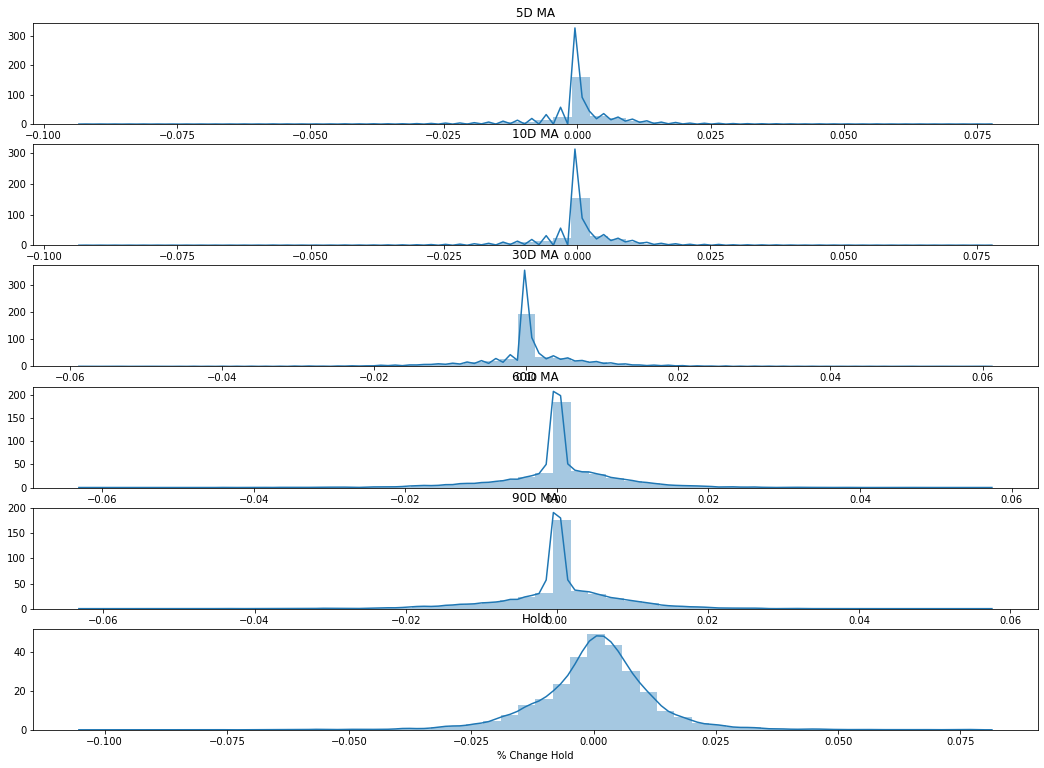

In [10]:
fig, ax = plt.subplots(6,1,figsize = (18,13))
for i in range(len(df_portfolios.columns)):
    col = df_portfolios.columns[i]
    df["% Change " + col] = df_portfolios[col].pct_change().shift(periods=-1, fill_value=0)
    ax[i].set_title(col)
    sns.distplot(df["% Change " + col], ax = ax[i])

In [11]:
print("Return:")
portfolio_return = (df_portfolios.iloc[-1] - df_portfolios.iloc[0])/df_portfolios.iloc[0]
print(portfolio_return)
print()

print("Volatility:")
vol = df_portfolios.std()
print(vol)
print()

print("Sharpe Ratio (Rf = 2.5%)")
print((portfolio_return-1.3075)/vol)

Return:
5D MA     23.252078
10D MA     7.874865
30D MA     8.223046
60D MA    11.670954
90D MA     7.107598
Hold       9.801580
dtype: float64

Volatility:
5D MA     2228.941119
10D MA     907.458371
30D MA     977.345252
60D MA    1248.882341
90D MA     778.631521
Hold      1430.023176
dtype: float64

Sharpe Ratio (Rf = 2.5%)
5D MA     0.009845
10D MA    0.007237
30D MA    0.007076
60D MA    0.008298
90D MA    0.007449
Hold      0.005940
dtype: float64


# Splitting by Decade

In [12]:
def report(df):
    strategies = ["5D MA", "10D MA", "30D MA", "60D MA", "90D MA", "Hold"]

    df_portfolios = pd.DataFrame(index=df.index)
    fig, ax = plt.subplots()

    for strategy in strategies:
        value = 340.523
        value_list = []
        for i in range(len(df)):
            r = df["% Change"][i]
            if df[strategy][i] == "Buy":
                value *= (1+r)
            value_list.append(value)
        df_portfolios[strategy] = value_list

    df_portfolios.plot(ax=ax, figsize=(15,5))
    print("Return:")
    portfolio_return = (df_portfolios.iloc[-1] - df_portfolios.iloc[0])/df_portfolios.iloc[0]
    print(portfolio_return)
    print()

    print("Volatility:")
    vol = df_portfolios.std()
    print(vol)
    print()

    print("Sharpe Ratio (Rf = 2.5%)")
    print((portfolio_return-1.3075)/vol)


### 1990 - 2000

Return:
5D MA     9.354090
10D MA    5.237668
30D MA    3.805548
60D MA    3.250701
90D MA    2.278969
Hold      1.732497
dtype: float64

Volatility:
5D MA     810.548872
10D MA    457.507055
30D MA    343.536375
60D MA    307.065021
90D MA    234.441744
Hold      218.528118
dtype: float64

Sharpe Ratio (Rf = 2.5%)
5D MA     0.009927
10D MA    0.008590
30D MA    0.007272
60D MA    0.006328
90D MA    0.004144
Hold      0.001945
dtype: float64


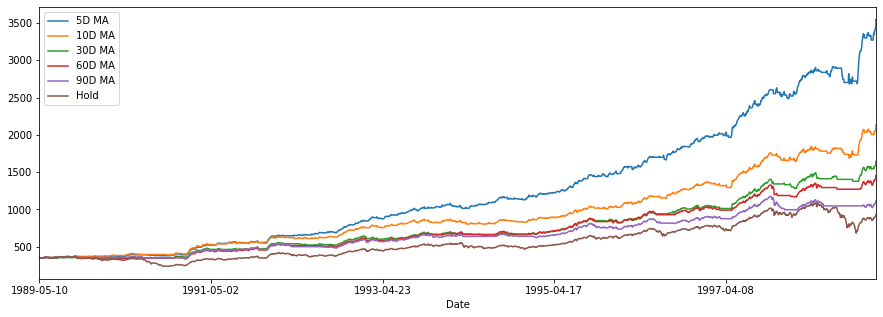

In [13]:
df90s = df[:2440]
report(df90s)

### 2000 - 2010

Return:
5D MA    -0.072454
10D MA   -0.095908
30D MA    0.275122
60D MA    0.398329
90D MA    0.126002
Hold      0.542109
dtype: float64

Volatility:
5D MA      86.606008
10D MA     67.434524
30D MA     93.058638
60D MA     81.953779
90D MA     75.795705
Hold      159.295088
dtype: float64

Sharpe Ratio (Rf = 2.5%)
5D MA    -0.015934
10D MA   -0.020811
30D MA   -0.011094
60D MA   -0.011094
90D MA   -0.015588
Hold     -0.004805
dtype: float64


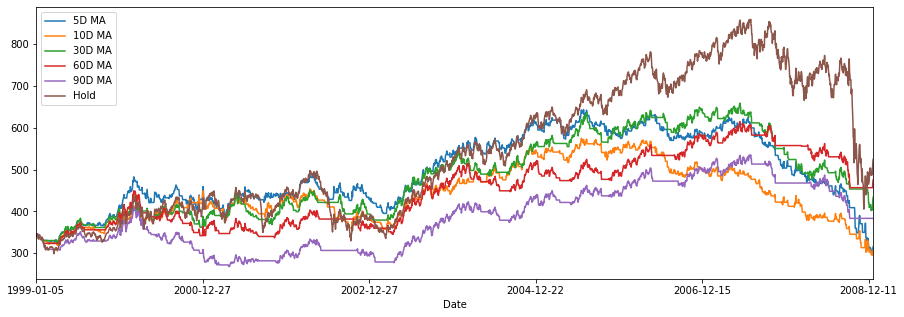

In [14]:
df00s = df[2440:4955]
report(df00s)

### 2010 - 2020

Return:
5D MA     1.913803
10D MA    0.767019
30D MA    0.643056
60D MA    1.292515
90D MA    1.196912
Hold      2.583504
dtype: float64

Volatility:
5D MA     186.459795
10D MA     59.905371
30D MA     63.441272
60D MA    125.565112
90D MA    127.729516
Hold      406.687739
dtype: float64

Sharpe Ratio (Rf = 2.5%)
5D MA     0.003252
10D MA   -0.009022
30D MA   -0.010473
60D MA   -0.000119
90D MA   -0.000866
Hold      0.003138
dtype: float64


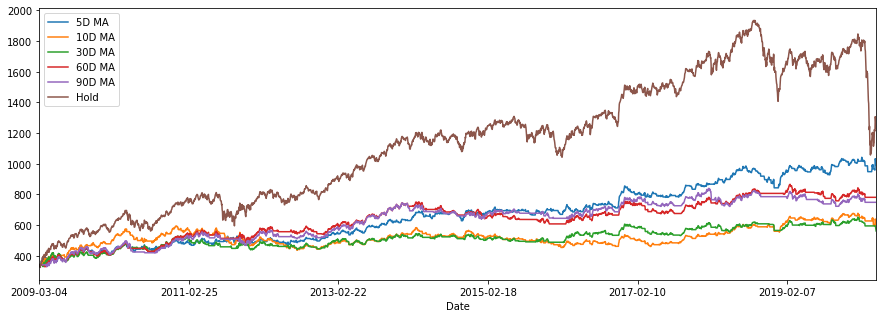

In [15]:
df10s = df[4995:]
report(df10s)

# Splitting by Bullish/Bearish

### April 2000 to December 2002

Return:
5D MA     0.293180
10D MA    0.261574
30D MA    0.249008
60D MA    0.103324
90D MA   -0.119148
Hold      0.313843
dtype: float64

Volatility:
5D MA     38.915380
10D MA    30.520798
30D MA    24.588193
60D MA    25.006936
90D MA    31.803313
Hold      39.371203
dtype: float64

Sharpe Ratio (Rf = 2.5%)
5D MA    -0.026065
10D MA   -0.034269
30D MA   -0.043049
60D MA   -0.048154
90D MA   -0.044858
Hold     -0.025238
dtype: float64


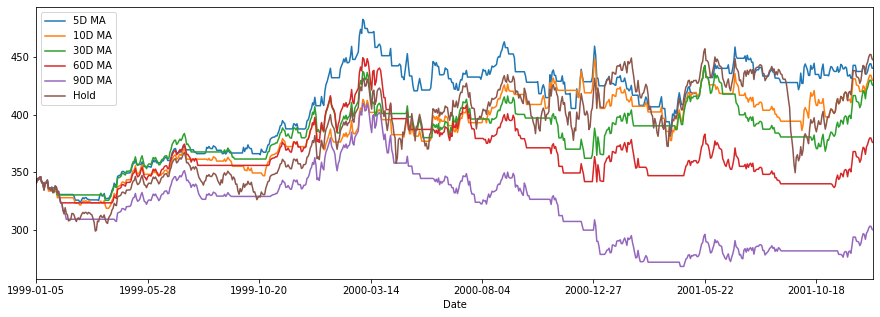

In [16]:
dfdotcom = df[2440:3192]
report(dfdotcom)

### October 2007 to March 2009